In [1]:
%matplotlib inline 
#%matplotlib notebook
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

# Robot Sample and return (Image Processing)
Using Udacity's Roversim simulator

## Image Thresholding

In [2]:
os.listdir('simdata')
telemetry_data = pd.read_csv('simdata/robot_log.csv', sep = ';')

In [3]:
telemetry_data.head()

,Path,SteerAngle,Throttle,Brake,Speed,X_Position,Y_Position,Pitch,Yaw,Roll
0,C:\Users\user\workspace\robots\simdata\IMG\rob...,0.0,0.0,1.0,0.0,99.66999,85.58897,0.000238,41.86549,-1.482522e-06
1,C:\Users\user\workspace\robots\simdata\IMG\rob...,0.0,0.0,0.0,0.0,99.66999,85.58897,0.000238,41.86549,-7.237717e-07
2,C:\Users\user\workspace\robots\simdata\IMG\rob...,0.0,0.0,0.0,0.0,99.66999,85.58897,0.000238,41.86549,-1.547087e-07
3,C:\Users\user\workspace\robots\simdata\IMG\rob...,0.0,0.0,0.0,0.0,99.66999,85.58897,0.000239,41.86549,5.014044e-07
4,C:\Users\user\workspace\robots\simdata\IMG\rob...,0.0,0.0,0.0,0.0,99.66999,85.58897,0.000239,41.86549,1.434242e-06


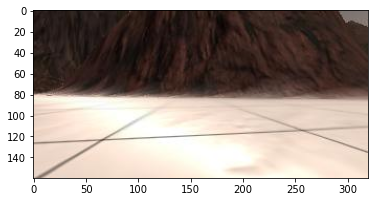

In [4]:
filename = 'sample_images/robot_sample1.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

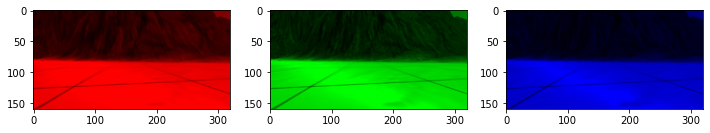

In [5]:
chan = np.copy(image)
### Red Channel (Channel 0)
chan_red = np.copy(image)
chan_red[:,:,[1,2]] = 0

### green Channel (channel 1)
chan_green = np.copy(image)
chan_green[:,:,[0,2]] = 0

### Blue Channel (Channel 2)
chan_blue = np.copy(image)
chan_blue[:,:,[1,0]] = 0

fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(chan_red)
plt.subplot(132)
plt.imshow(chan_green)
plt.subplot(133)
plt.imshow(chan_blue)

In [6]:
def colorThreshold(img, rbg_threshold = (100,100,100)):
    """
    Return Binary Image which is thresholded by thr rbg pixel vales 
    given in rbg_threshold i.e. If pixel is > thres assign 1
    and if pixel is < thres assing 0
    args:
          img - img to be thresholded
          rbg_threshold - (r,g,b)
    """
    temp = np.zeros(img.shape)
    rflags_h = img[:,:,0]>rbg_threshold[0]
    gflags_h = img[:,:,1]>rbg_threshold[1]
    bflags_h = img[:,:,2]>rbg_threshold[2]
    
    temp[:,:,0][rflags_h] = 1
    temp[:,:,1][gflags_h] = 1
    temp[:,:,2][bflags_h] = 1
    return temp

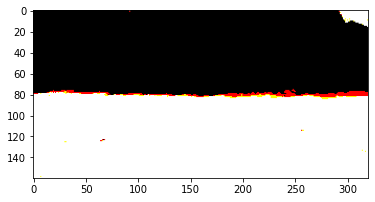

In [7]:
test = colorThreshold(chan, rbg_threshold = (100,100,100))
plt.imshow(test)

# Perspective Transform

As defined by the Cambrige dictionary, a transform means "to change completely the appearance or 
character of something or someone" and perspective is defined as " the art of representing three-dimensional objects on a two-dimensional surface so as to give the right impression of their height, width, depth, and position in relation to each other". Therefore, a perspective tranform deals with the conversion of a 3d representation of a world into a 2D representation of that world.  
<img src="images/perspective_transform_illustration.JPG" height = "1000" width= "420">
source: https://www.tutorialspoint.com/dip/perspective_transformation.htm



In [8]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'images',
 'RobotSampleAndReturnImageProcessing.ipynb',
 'sample_images',
 'simdata']

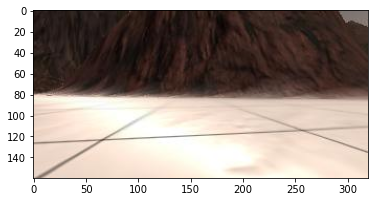

In [9]:
#%matplotlib notebook
#%matplotlib notebook
grid_sample1 = plt.imread('sample_images/robot_sample1.jpg')
plt.imshow(grid_sample1)
### (H, W, D)
plt.show()

In [10]:
offset = 10
dst_size = 20
img = np.copy(grid_sample1)
s =img.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


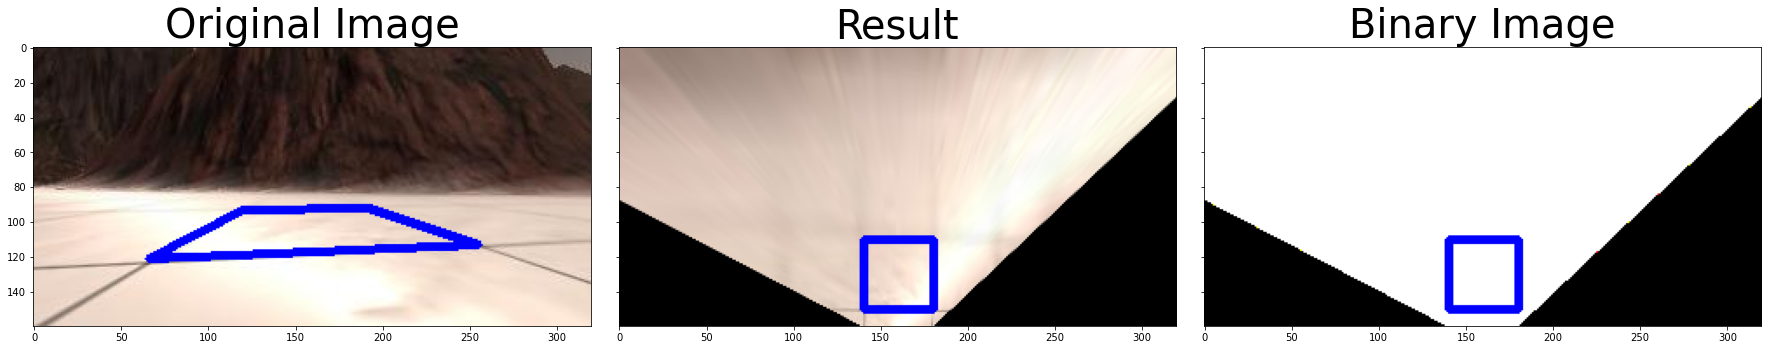

In [11]:
def perspectiveTransform(img, src, dst):
    M = cv2.getPerspectiveTransform(src,dst)
    warp = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return warp 
### SOUCRE POINTS Reference points from Original Image (for calibration)
ref_points = np.float32([ [192.114,92.2649], [120.284, 93.013], [66.5331,121.781], [255.78,113.178]])
### Where do i want then to be (Destination points)
dst = np.float32([[s[1]/2-dst_size, s[0] - offset- (2*dst_size)],
                  [s[1]/2+dst_size, s[0] - offset- (2*dst_size)],
                  [s[1]/2+dst_size, s[0] - offset ],
                  [s[1]/2-dst_size, s[0] - offset ]]
                )
warped = perspectiveTransform(img, ref_points,dst)
bin_img = colorThreshold(warped)
### Highlight the boxes

cv2.polylines(img, np.int32([ref_points]), True, (0,0,255), 3 )
cv2.polylines(warped, np.int32([dst]), True, (0,0,255), 3 )
cv2.polylines(bin_img, np.int32([dst]), True, (0,0,255), 3 )
f, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(24,6), sharey =True)
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize =40)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize =40)
ax3.imshow(bin_img)
ax3.set_title('Binary Image', fontsize = 40)
plt.subplots_adjust(left=0.0, right =1, top=0.9, bottom =0.0)
plt.show()

# Warp, Threshold, and Map to Rover-Centric Coordinates


<img src="images/img.jpg" height = "1000" width= "420">

The White in the binary Image Indicates Naviagable terain in view of the rover camera

In [12]:
os.listdir('sample_images')

['example_grid1.jpg', 'robot_sample1.jpg', 'robot_sample2.jpg']

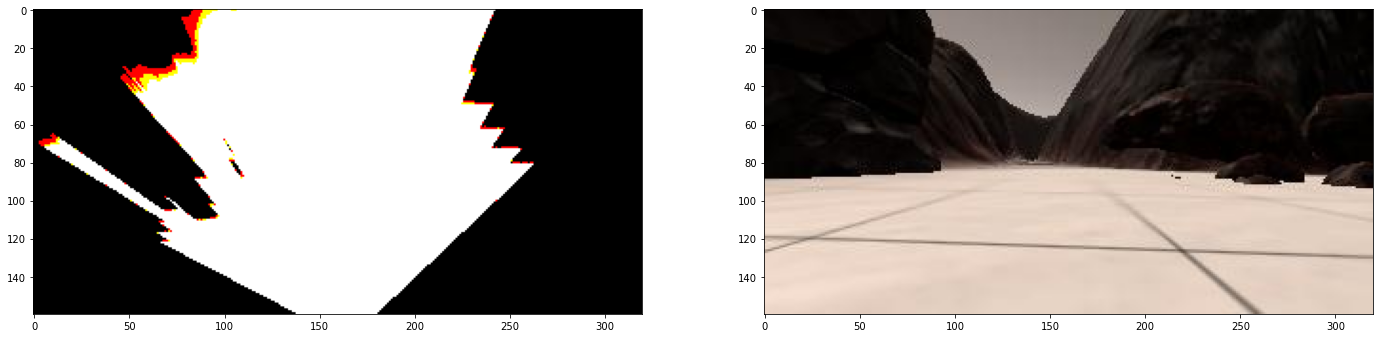

In [13]:
sample2 = plt.imread('sample_images/robot_sample2.jpg')
img2 = np.copy(sample2)

warped2 = perspectiveTransform(img2, ref_points,dst)
bin_img = colorThreshold(warped2)
f, (ax1,ax2) = plt.subplots(1,2, figsize = (24,6))

ax1.imshow(bin_img)
ax2.imshow(sample2)

In [14]:
### Return a tuple of array with the indexes of the non zero pixels in the imag
c1, c2, c3 = np.nonzero(bin_img)
#c1, c2, c3 = bin_img.nonzero()

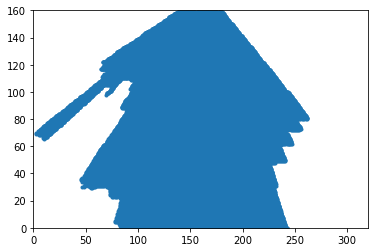

In [15]:
plt.plot(c2,c1, '.')
plt.xlim(0,320)
plt.ylim(0,160)
plt.show()

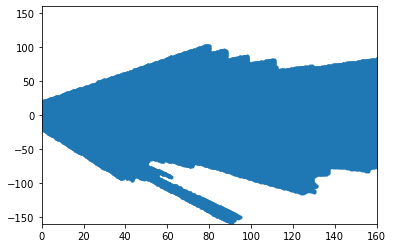

In [16]:
def roverCentriCoordinates(binary_image):
    c1, c2, c3 = np.nonzero(binary_image)
    s = binary_image.shape
    y_pix = c2 -  s[1]/2
    x_pix = s[1]/2 - c1
    return x_pix, y_pix

warped3= perspectiveTransform(img2, ref_points,dst)
bin_img = colorThreshold(warped3)
x_pix, y_pix = roverCentriCoordinates(bin_img)
plt.plot(x_pix, y_pix,'.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
plt.show()

## Map  to World coordinates 
Mapping the Car-Centric coodinates to World Map.
To do this we will need to use rotation which will account for the
the fact that whe the camera takes a picture the Car can be facing any
aarbituary direction, given by it's yaw angle, after which, a translation is needed to account for the fact that the Car may be located at any position in the world when it takes a picture.



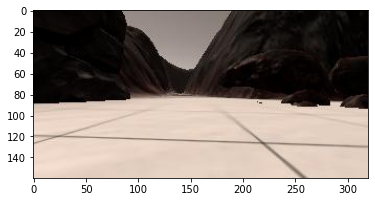

In [17]:
sample3 = plt.imread('sample_images/robot_sample2.jpg')
plt.imshow(sample3)

In [18]:
### Choose randome number for the position and yaw
rover_yaw = np.random.random(1)*360
rover_xpos = np.random.random(1)*160 +20
rover_ypos = np.random.random(1)*160 +20

In [19]:
2*np.pi

6.283185307179586

In [20]:
def pixRotate(xpix,ypix,yaw):
    #convert to Radians
    yaw_rad = yaw * np.pi / 180
    xpix_rotated = xpix*np.cos(yaw_rad) - ypix*np.sin(yaw_rad)
    ypix_rotated = xpix*np.sin(yaw_rad) + ypix*np.cos(yaw_rad)
    return xpix_rotated,ypix_rotated

def pixTranslateClip(xpix_rot,ypix_rot,yaw,xpos,ypos, world_size,  scale = 10):
    x_world = np.int_(xpos + (xpix_rot/scale))
    y_world = np.int_(ypos + (xpix_rot/scale))
    xpix_world = np.clip(x_world, 0,world_size -1)
    ypix_world = np.clip(y_world, 0,world_size -1)
    return xpix_world,ypix_world

def pixToWorld(xpix_rot,ypix_rot,yaw,xpos,ypos, scale = 10, world_size =200):
    xrot , yrot = pixRotate(xpix,ypix,yaw)
    xtran, ytran = pixTranslateClip(xrot, yrot, yaw, xpos, ypos,scale, world_size)
    return xtran, ytran

Xpos = [54.94433484] Ypos = [169.0928267] Yaw = [203.75073326]


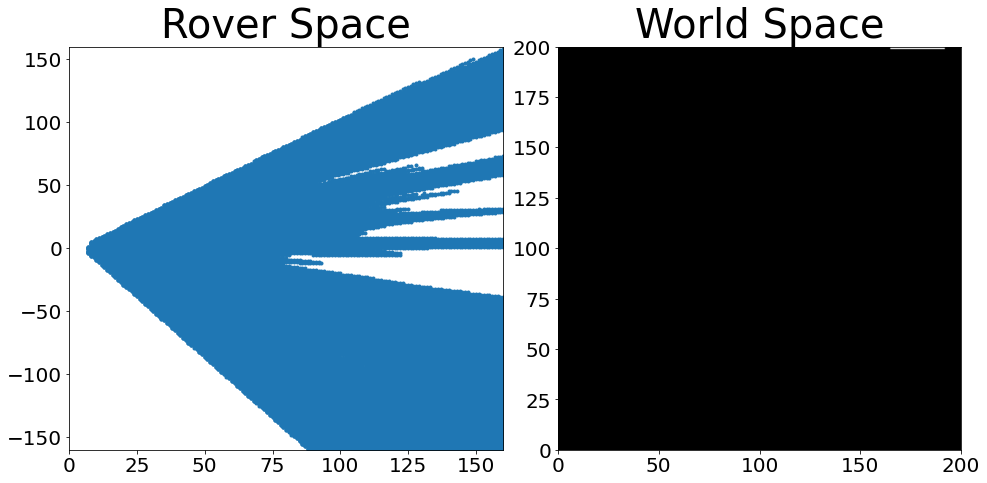

In [21]:

# Define calibration box in source (actual) and destination (desired) coordinates
# These source and destination points are defined to warp the image
# to a grid where each 10x10 pixel square represents 1 square meter
dst_size = 5 
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6



### SOUCRE POINTS Reference points from Original Image
#ref_points = np.float32([ [192.114,92.2649], [120.284, 93.013], [66.5331,121.781], [255.78,113.178]])
### Where do i want then to be (Destination points)
dst = np.float32([[s[1]/2-dst_size, s[0] - offset- (2*dst_size)],
                  [s[1]/2+dst_size, s[0] - offset- (2*dst_size)],
                  [s[1]/2+dst_size, s[0] - offset ],
                  [s[1]/2-dst_size, s[0] - offset ]]
                )

warped = perspectiveTransform(img, ref_points,dst)
bin_img = colorThreshold(warped)
# Extract navigable terrain pixels
xpix, ypix = roverCentriCoordinates(bin_img)
# Generate 200 x 200 pixel worldmap
worldmap = np.zeros((200, 200))
scale = 10
# Get navigable pixel positions in world coords
x_world, y_world = pixToWorld(xpix, ypix, rover_xpos, 
                                rover_ypos, rover_yaw, 
                                worldmap.shape[0], scale)
# Add pixel positions to worldmap
worldmap[y_world, x_world] += 1
print('Xpos =', rover_xpos, 'Ypos =', rover_ypos, 'Yaw =', rover_yaw)
# Plot the map in rover-centric coords

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
f.tight_layout()
ax1.plot(xpix, ypix, '.')
ax1.set_title('Rover Space', fontsize=40)
ax1.set_ylim(-160, 160)
ax1.set_xlim(0, 160)
ax1.tick_params(labelsize=20)

ax2.imshow(worldmap, cmap='gray')
ax2.set_title('World Space', fontsize=40)
ax2.set_ylim(0, 200)
ax2.tick_params(labelsize=20)
ax2.set_xlim(0, 200)


plt.subplots_adjust(left=0.1, right=1, top=0.9, bottom=0.1)
plt.show() # Uncomment if running on your local machine